# Bacalhau Production Network Statistics 📈

## What have we here 👀

In [1]:
!ls

analysis.ipynb   events-1.json    events-4.json
download.sh      events-2.json    events-mind.json
events-0.json    events-3.json    venv


In [2]:
!pip3 install -q matplotlib pandas

You should consider upgrading via the '/Users/luke/bacalhau-data/venv/bin/python -m pip install --upgrade pip' command.


## Let's do this 💪

In [3]:
import json
import pprint
from collections import defaultdict
from dateutil.parser import parse
import pandas as pd

In [4]:
i = 0
lambdas = 0
non_lambdas = 0
cant_parse = 0

# ("year,day_of_year")

days = defaultdict(int)
rows = []

for node in ("0"): # each node receives all 'Create' events
    for line in open(f"events-{node}.json"):
        i += 1
        try:
            j = json.loads(line)
        except Exception as e:
            cant_parse += 1

        date = j["time"].split("T")[0]
        if j["Event"]["EventName"] == "Created":
            spec = j["Event"]["Spec"]["Docker"].get("Entrypoint", [])
            is_lambda = "λ" in "".join(spec)
            # print(f"{spec} is lambda: {is_lambda}")
            if is_lambda:
                lambdas += 1
            else:
                non_lambdas += 1
                days[date] += 1
                rows.append(j)

print(f"lambdas: {lambdas}, non-lambda jobs: {non_lambdas}, can't parse: {cant_parse}")

#pprint.pprint(days)

lambdas: 154114, non-lambda jobs: 23554, can't parse: 4


In [5]:
# check count on diff nodes for sanity

for node in ("0", "1", "2", "3", "4", "mind"): # each node receives all 'Create' events
    z = []
    for line in open(f"events-{node}.json"):
        i += 1
        try:
            j = json.loads(line)
        except Exception as e:
            cant_parse += 1
        if j["Event"]["EventName"] == "Created":
            spec = j["Event"]["Spec"]["Docker"].get("Entrypoint", [])
            is_lambda = "λ" in "".join(spec)
            # print(f"{spec} is lambda: {is_lambda}")
            if is_lambda:
                lambdas += 1
            else:
                non_lambdas += 1
                z.append(j)
    df = pd.json_normalize(data=z)
    print(f"node-{node} count = {len(df)}")

node-0 count = 23554
node-1 count = 23595
node-2 count = 23483
node-3 count = 16958
node-4 count = 17051
node-mind count = 10957


In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,13)
%matplotlib inline

In [20]:
#df = pd.DataFrame(data=rows)
df = pd.json_normalize(data=rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23554 entries, 0 to 23553
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Type                                        23554 non-null  object 
 1   time                                        23554 non-null  object 
 2   Event.APIVersion                            14363 non-null  object 
 3   Event.JobID                                 23554 non-null  object 
 4   Event.ClientID                              23554 non-null  object 
 5   Event.SourceNodeID                          23554 non-null  object 
 6   Event.EventName                             23554 non-null  object 
 7   Event.Spec.Engine                           23554 non-null  object 
 8   Event.Spec.Verifier                         23554 non-null  object 
 9   Event.Spec.Publisher                        23554 non-null  object 
 10  Event.Spec

In [32]:
df.groupby("Event.Spec.Engine").count()

,Type,time,Event.APIVersion,Event.JobID,Event.ClientID,Event.SourceNodeID,Event.EventName,Event.Spec.Verifier,Event.Spec.Publisher,Event.Spec.Docker.Image,...,Event.Spec.Resources.CPU,Event.Spec.Resources.Memory,Event.Spec.Docker.EnvironmentVariables,Event.Spec.Timeout,Event.Spec.Language.Language,Event.Spec.Language.LanguageVersion,Event.Spec.Language.DeterministicExecution,Event.Spec.Language.ProgramPath,Event.Spec.Language.Command,Event.Deal.Confidence
Event.Spec.Engine,,,,,,,,,,,,,,,,,,,,,
Docker,23180,23180,13989,23180,23180,23180,23180,23180,23180,23159,...,7,141,1305,16904,0,0,0,0,0,22
Language,5,5,5,5,5,5,5,5,5,0,...,0,0,0,5,5,5,5,3,2,0
Wasm,369,369,369,369,369,369,369,369,369,0,...,0,0,0,165,0,0,0,0,0,0


In [33]:
df.groupby("Event.Spec.Resources.GPU").count()

,Type,time,Event.APIVersion,Event.JobID,Event.ClientID,Event.SourceNodeID,Event.EventName,Event.Spec.Engine,Event.Spec.Verifier,Event.Spec.Publisher,...,Event.Spec.Resources.CPU,Event.Spec.Resources.Memory,Event.Spec.Docker.EnvironmentVariables,Event.Spec.Timeout,Event.Spec.Language.Language,Event.Spec.Language.LanguageVersion,Event.Spec.Language.DeterministicExecution,Event.Spec.Language.ProgramPath,Event.Spec.Language.Command,Event.Deal.Confidence
Event.Spec.Resources.GPU,,,,,,,,,,,,,,,,,,,,,
,20633,20633,11442,20633,20633,20633,20633,20633,20633,20633,...,7,7,1305,16049,5,5,5,3,2,22
-i,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2915,2915,2915,2915,2915,2915,2915,2915,2915,2915,...,0,134,0,1025,0,0,0,0,0,0
2,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0


In [8]:
len(df.groupby("Event.ClientID"))

687

In [9]:
len(df)

23554

In [17]:
df

,Type,time,Event.APIVersion,Event.JobID,Event.ClientID,Event.SourceNodeID,Event.EventName,Event.Spec.Engine,Event.Spec.Verifier,Event.Spec.Publisher,...,Event.Spec.Resources.CPU,Event.Spec.Resources.Memory,Event.Spec.Docker.EnvironmentVariables,Event.Spec.Timeout,Event.Spec.Language.Language,Event.Spec.Language.LanguageVersion,Event.Spec.Language.DeterministicExecution,Event.Spec.Language.ProgramPath,Event.Spec.Language.Command,Event.Deal.Confidence
0,model.JobEvent,2022-10-27T16:21:26.973624198Z,V1alpha1,13eae387-ca2c-41a0-9af7-78a7e4155a3e,378a698095cad1a843aa720cfb10ef2d057b8ed4902ac7...,QmYgxZiySj3MRkwLSL4X2MF5F9f2PMhAE3LV49XkfNL1o3,Created,Docker,Noop,Estuary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,model.JobEvent,2022-10-27T16:30:38.688682675Z,V1alpha1,a765fa23-750f-4738-8e6c-b6168555fb4a,7a25e2e5c540ec32a3499f8d5542f4984be4c9af92a6c4...,QmXaXu9N5GNetatsvwnTfQqNtSeKAD6uCmarbh3LMRYAcF,Created,Docker,Noop,Estuary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,model.JobEvent,2022-10-27T16:30:53.816810266Z,V1alpha1,505b2a0b-4eff-4d80-b6d5-8fbea4872bed,378a698095cad1a843aa720cfb10ef2d057b8ed4902ac7...,QmYgxZiySj3MRkwLSL4X2MF5F9f2PMhAE3LV49XkfNL1o3,Created,Docker,Noop,Estuary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,model.JobEvent,2022-10-27T16:35:04.969458296Z,V1alpha1,12dbfc0d-a11d-450b-8385-0e8c8ff1ae05,378a698095cad1a843aa720cfb10ef2d057b8ed4902ac7...,QmYgxZiySj3MRkwLSL4X2MF5F9f2PMhAE3LV49XkfNL1o3,Created,Docker,Noop,Estuary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,model.JobEvent,2022-10-27T16:41:00.18244058Z,V1alpha1,aee01d32-5a34-406f-b7f2-01bc2f7704d1,378a698095cad1a843aa720cfb10ef2d057b8ed4902ac7...,QmXaXu9N5GNetatsvwnTfQqNtSeKAD6uCmarbh3LMRYAcF,Created,Docker,Noop,Estuary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,model.JobEvent,2022-12-06T11:06:01.904430584Z,NaN,e090d775-7d01-4159-8fe2-8c82cafa2249,c3cb840d776b1015999296ef3c4b4b94941bebba36027e...,QmdZQ7ZbhnvWY1J12XYKGHApJ6aufKyLNSvf8jZBrBaAVL,Created,Docker,Noop,Ipfs,...,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN
23550,model.JobEvent,2022-12-06T11:06:01.907639635Z,NaN,e090d775-7d01-4159-8fe2-8c82cafa2249,c3cb840d776b1015999296ef3c4b4b94941bebba36027e...,QmdZQ7ZbhnvWY1J12XYKGHApJ6aufKyLNSvf8jZBrBaAVL,Created,Docker,Noop,Ipfs,...,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN
23551,model.JobEvent,2022-12-06T11:06:21.482977324Z,NaN,dee253b4-885d-4e49-b1be-5aca9d5a931f,199771480de3c9a60d1e76edb48094696a7fb38f96b7c7...,QmYgxZiySj3MRkwLSL4X2MF5F9f2PMhAE3LV49XkfNL1o3,Created,Docker,Noop,Ipfs,...,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN
23552,model.JobEvent,2022-12-06T11:08:21.310001747Z,NaN,02d616ed-6c3c-413d-adca-c60b119248d5,978f254c7f2a9cb172d5dccfa8fa94e474d7676b02a698...,QmdZQ7ZbhnvWY1J12XYKGHApJ6aufKyLNSvf8jZBrBaAVL,Created,Docker,Noop,Ipfs,...,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
date_counts = pd.DataFrame.from_dict(days, orient='index')

In [11]:
date_counts

,0
2022-10-27,143
2022-10-28,2101
2022-10-29,135
2022-10-30,105
2022-10-31,91
2022-11-01,674
2022-11-02,2060
2022-11-03,478
2022-11-04,51
2022-11-05,57


In [39]:
df.to_csv("raw.csv")

In [48]:
pd.set_option('display.max_rows', 200)
df.groupby("Event.Spec.Docker.Image").count()

,Type,time,Event.APIVersion,Event.JobID,Event.ClientID,Event.SourceNodeID,Event.EventName,Event.Spec.Engine,Event.Spec.Verifier,Event.Spec.Publisher,...,Event.Spec.Resources.CPU,Event.Spec.Resources.Memory,Event.Spec.Docker.EnvironmentVariables,Event.Spec.Timeout,Event.Spec.Language.Language,Event.Spec.Language.LanguageVersion,Event.Spec.Language.DeterministicExecution,Event.Spec.Language.ProgramPath,Event.Spec.Language.Command,Event.Deal.Confidence
Event.Spec.Docker.Image,,,,,,,,,,,,,,,,,,,,,
,11,11,11,11,11,11,11,11,11,11,...,0,0,0,3,0,0,0,0,0,0
nvidia/cuda:11.2.0-cudnn8-devel-ubuntu18.04,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
\,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
alpine,6,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0
amancevice/pandas,159,159,159,159,159,159,159,159,159,159,...,0,0,0,132,0,0,0,0,0,0
amqa/filecoien-fibo,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0
amqa/filecoin-fibo,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258,...,0,0,1258,1253,0,0,0,0,0,0
amqa/flc,35,35,35,35,35,35,35,35,35,35,...,0,0,35,0,0,0,0,0,0,0
bacalhauproject/uploader:v1.0,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [66]:
pd.set_option('display.max_rows', 600)
df.groupby("Event.ClientID").count()["Type"].reset_index(name='count') \
                             .sort_values(['count'], ascending=False).to_csv("user_count.csv")

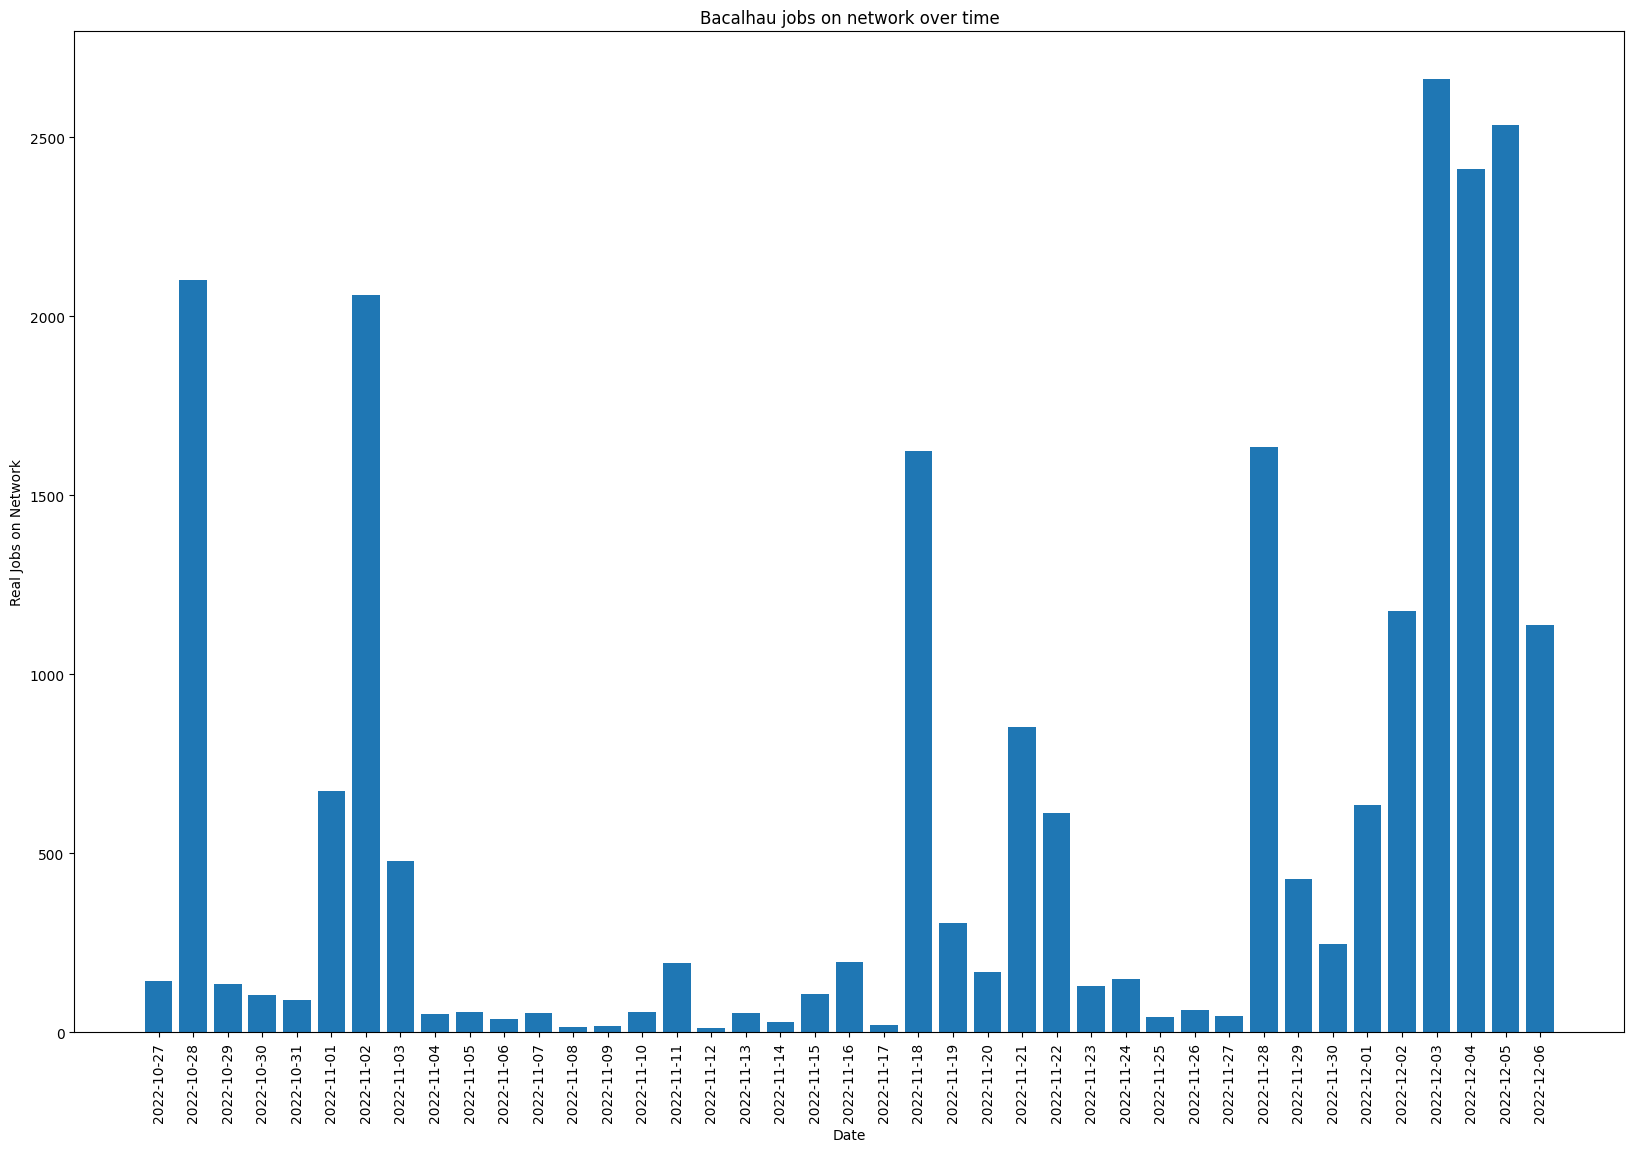

In [12]:
plt.bar(range(len(days)), list(days.values()), align='center')
plt.xticks(range(len(days)), list(days.keys()))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Real Jobs on Network")
plt.title("Bacalhau jobs on network over time")
plt.show()

---

In [13]:
!tail -n 1 events-0.json

{"Type":"model.JobEvent","Event":{"JobID":"a42325c8-9eb8-479a-9571-425044c799c8","SourceNodeID":"QmVAb7r2pKWCuyLpYWoZr9syhhFnTWeFaByHdb8PkkhLQG","EventName":"ResultsPublished","Spec":{"Docker":{},"Language":{"JobContext":{}},"Wasm":{},"Resources":{"GPU":""},"Sharding":{}},"JobExecutionPlan":{},"Deal":{},"VerificationResult":{},"PublishedResult":{"StorageSource":"IPFS","Name":"job-a42325c8-9eb8-479a-9571-425044c799c8-shard-0-host-QmVAb7r2pKWCuyLpYWoZr9syhhFnTWeFaByHdb8PkkhLQG","CID":"QmPN8BmQLgCK9aUAfKbS3ZQ7EA2c5CNAdtc4JK3FpjttyT"},"EventTime":"2022-12-06T11:08:37.633481231Z","SenderPublicKey":"CAASpgIwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQCxeSv2y9/YrjGn0TOAHJ4ughLt40ty+ct13WLnnm5tiIGKKJVskbokj3/db7frMJ4CQaDlJLCyiecroQpMVKAIKviQ87oQ7kB9cnYAcBVnSCTucxMqQ1E0r4cWx5L97UpkNcQjMySM6fFX/93Yu/iNWP7/n4gL5FVXxEMBxxMQQa2efvNEw6VG7gy5ghbZCVcvesywTxL0TRPoptSEV/avykXmcTZ/IPJs1fm8AfJ4P6N+H7T7ZkhbetTdOupc3vAYwHP+Wh4EmPcxbv1zgSm6KdymECQG1B386GR7livdW/74oUhwyYylixX5nEy73Tq+DKi3q27e3OutcMXYmMTTAgMBAAE

In [14]:
!cat download.sh

#!/bin/bash
set -xeuo pipefail
gcloud compute scp bacalhau-vm-production-0:/data/.bacalhau/bacalhau-event-tracer.json --project bacalhau-production ./events-0.json &
gcloud compute scp bacalhau-vm-production-1:/data/.bacalhau/bacalhau-event-tracer.json --project bacalhau-production ./events-1.json &
gcloud compute scp bacalhau-vm-production-2:/data/.bacalhau/bacalhau-event-tracer.json --project bacalhau-production ./events-2.json &
gcloud compute scp bacalhau-vm-production-3:/data/.bacalhau/bacalhau-event-tracer.json --project bacalhau-production ./events-3.json &
gcloud compute scp bacalhau-vm-production-4:/data/.bacalhau/bacalhau-event-tracer.json --project bacalhau-production --zone europe-west4-a ./events-4.json &
scp luke@mind.lukemarsden.net:.bacalhau/bacalhau-event-tracer.json ./events-mind.json


In [15]:
!head -n 1 events-0.json

{"Type":"model.JobEvent","Event":{"APIVersion":"V1alpha1","JobID":"13eae387-ca2c-41a0-9af7-78a7e4155a3e","ClientID":"378a698095cad1a843aa720cfb10ef2d057b8ed4902ac7ea44c0408a1bde3459","SourceNodeID":"QmYgxZiySj3MRkwLSL4X2MF5F9f2PMhAE3LV49XkfNL1o3","EventName":"Created","Spec":{"Engine":"Docker","Verifier":"Noop","Publisher":"Estuary","Docker":{"Image":"ghcr.io/bacalhau-project/examples/stable-diffusion-gpu:0.0.1","Entrypoint":["python","main.py","--o","./outputs","--p","carrots diverging into infinity, trending on artstation"]},"Language":{"JobContext":{}},"Wasm":{},"Resources":{"GPU":"1"},"outputs":[{"StorageSource":"IPFS","Name":"outputs","path":"/outputs"}],"Sharding":{"BatchSize":1,"GlobPatternBasePath":"/inputs"}},"JobExecutionPlan":{"ShardsTotal":1},"Deal":{"Concurrency":3},"VerificationResult":{},"PublishedResult":{},"EventTime":"2022-10-27T16:21:26.966859264Z","SenderPublicKey":"CAASpgIwggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDF5pYaTdt4UwzslPRDr8XFXv1clttGGIWENlnECLVqswrQVp5xr